In [63]:
import os
import glob
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

In [25]:
meta_train = pd.read_csv("train.csv")
print(meta_train.columns, '\n', len(meta_train))

Index(['primary_label', 'secondary_labels', 'type', 'filename', 'collection',
       'rating', 'url', 'latitude', 'longitude', 'scientific_name',
       'common_name', 'author', 'license'],
      dtype='object') 
 28564


In [18]:
l = []
for folder in os.listdir('train_audio'):
    for file in glob.glob(os.path.join('train_audio', folder, '*')):
        l.append(file)
len(l)

28564

(array([7948.,   26.,  228.,   70.,  752.,  360., 2886.,  895., 7582.,
        7817.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

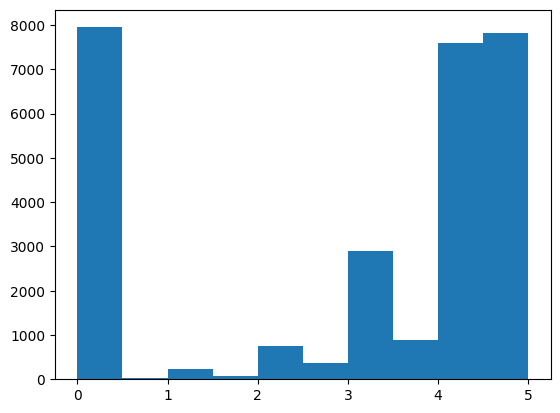

In [23]:
plt.hist(meta_train['rating'])

In [28]:
len(meta_train['primary_label'].unique())

206

In [30]:
meta_train['primary_label'].value_counts()

primary_label
grekis     990
compau     808
trokin     787
roahaw     709
banana     610
          ... 
42113        2
21116        2
1139490      2
21038        2
64862        2
Name: count, Length: 206, dtype: int64

In [32]:
meta_train_good_rating = meta_train[meta_train['rating']>=3]
print(len(meta_train_good_rating), len(meta_train_good_rating)/len(meta_train))

19180 0.6714745833916819


In [33]:
meta_train_good_rating['primary_label'].value_counts()

primary_label
grekis     477
roahaw     463
yeofly1    452
banana     425
trokin     420
          ... 
46010        1
65547        1
65962        1
134933       1
plctan1      1
Name: count, Length: 170, dtype: int64

(array([42.,  5.,  5.,  4.,  6., 13., 26., 38., 51., 16.]),
 array([0.        , 0.41666667, 0.83333333, 1.25      , 1.66666667,
        2.08333333, 2.5       , 2.91666667, 3.33333333, 3.75      ,
        4.16666667]),
 <BarContainer object of 10 artists>)

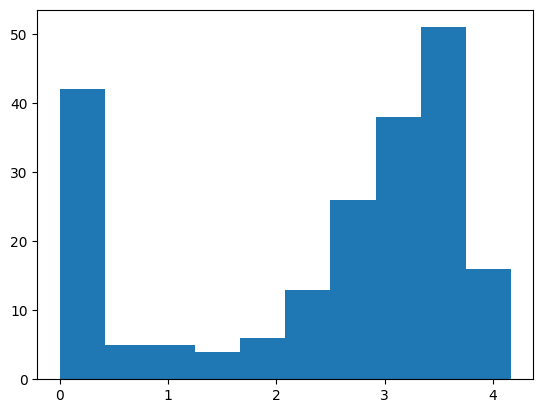

In [36]:
plt.hist(meta_train.groupby('primary_label').mean('rating')['rating'])

Est-ce que le rating est différent selon la classe d'animal ?

In [37]:
taxonomy = pd.read_csv('taxonomy.csv')

In [38]:
meta_train_taxonomy = pd.merge(meta_train, taxonomy, on='primary_label')

In [45]:
meta_train_taxonomy.groupby('class_name').mean('rating')['rating']

class_name
Amphibia    0.952830
Aves        2.992025
Insecta     0.000000
Mammalia    0.247191
Name: rating, dtype: float64

In [46]:
meta_train_taxonomy['primary_label'].value_counts()

primary_label
grekis     990
compau     808
trokin     787
roahaw     709
banana     610
          ... 
42113        2
21116        2
1139490      2
21038        2
64862        2
Name: count, Length: 206, dtype: int64

In [51]:
meta_train_aves = meta_train_taxonomy[meta_train_taxonomy['class_name']=='Aves']
meta_train_aves_good_rating = meta_train_aves[meta_train_aves['rating']>=3]
print(len(meta_train_aves), len(meta_train_aves)/len(meta_train_taxonomy))
print(len(meta_train_aves_good_rating), len(meta_train_aves_good_rating)/len(meta_train_aves))

27648 0.9679316622321804
19031 0.6883318865740741


In [50]:
meta_train_aves['primary_label'].value_counts()

primary_label
grekis     990
compau     808
trokin     787
roahaw     709
banana     610
          ... 
shghum1     15
sahpar1     14
norscr1     14
turvul      11
plctan1      6
Name: count, Length: 146, dtype: int64

In [49]:
meta_train_aves_good_rating['primary_label'].value_counts()

primary_label
grekis     477
roahaw     463
yeofly1    452
banana     425
trokin     420
          ... 
rutpuf1     13
norscr1     11
sahpar1      8
turvul       5
plctan1      1
Name: count, Length: 146, dtype: int64

In [52]:
data = {'all':meta_train_aves['primary_label'].value_counts(), 'ratings_sup_3':meta_train_aves_good_rating['primary_label'].value_counts()}
values_counts = pd.DataFrame(data)

In [54]:
values_counts['proportion'] = values_counts['ratings_sup_3'] / values_counts['all']
values_counts

,all,ratings_sup_3,proportion
primary_label,,,
amakin1,89,75,0.842697
amekes,409,127,0.310513
ampkin1,28,24,0.857143
anhing,91,57,0.626374
babwar,167,71,0.425150
...,...,...,...
yehcar1,238,155,0.651261
yelori1,60,47,0.783333
yeofly1,525,452,0.860952


(array([ 1.,  1.,  1.,  8.,  9., 21., 22., 51., 28.,  4.]),
 array([0.16666667, 0.25      , 0.33333333, 0.41666667, 0.5       ,
        0.58333333, 0.66666667, 0.75      , 0.83333333, 0.91666667,
        1.        ]),
 <BarContainer object of 10 artists>)

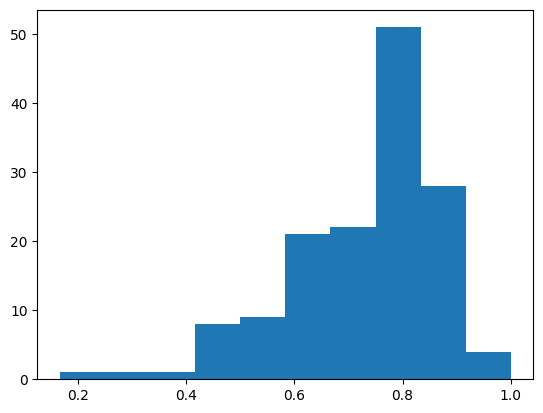

In [55]:
plt.hist(values_counts['proportion'])

In [56]:
len(values_counts[values_counts['proportion']<=0.4])/len(values_counts)

0.02054794520547945

longitude, latitude ?

  DPTO             NOMBRE_DPT          AREA    PERIMETER     HECTARES  \
0   05              ANTIOQUIA  6.335186e+10  1963728.843  6335185.555   
1   08              ATLANTICO  3.360765e+09   240936.172   336076.535   
2   11  SANTAFE DE BOGOTA D.C  1.650948e+09   323322.540   165094.778   
3   13                BOLIVAR  2.614189e+10  1309427.968  2614189.453   
4   15                 BOYACA  2.335258e+10  1364539.911  2335258.246   

                                            geometry  
0  POLYGON ((-76.3073 8.6193, -76.2981 8.6164, -7...  
1  POLYGON ((-74.8706 10.3612, -74.8764 10.3433, ...  
2  POLYGON ((-74.0229 4.7951, -74.0264 4.7836, -7...  
3  POLYGON ((-75.1595 10.4236, -75.1543 10.4097, ...  
4  POLYGON ((-72.213 7.0275, -72.2061 7.0246, -72...  


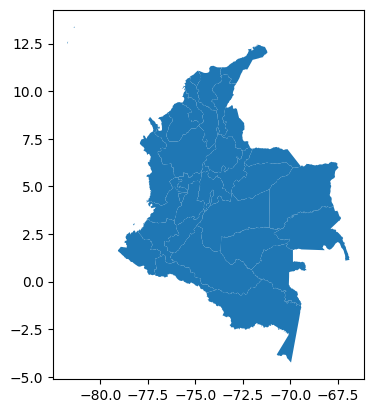

In [ ]:
colombie = gpd.read_file('colombie.geojson')
colombie.plot()
plt.show()

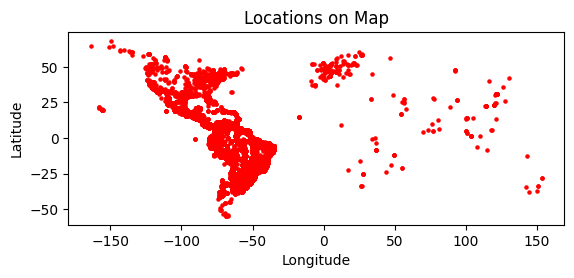

In [66]:
geometry = [Point(xy) for xy in zip(meta_train['longitude'], meta_train['latitude'])]

# Create a GeoDataFrame
meta_train_gdf = gpd.GeoDataFrame(meta_train, geometry=geometry)

meta_train_gdf.plot(marker='o', color='red', markersize=5)
plt.title('Locations on Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<Axes: >

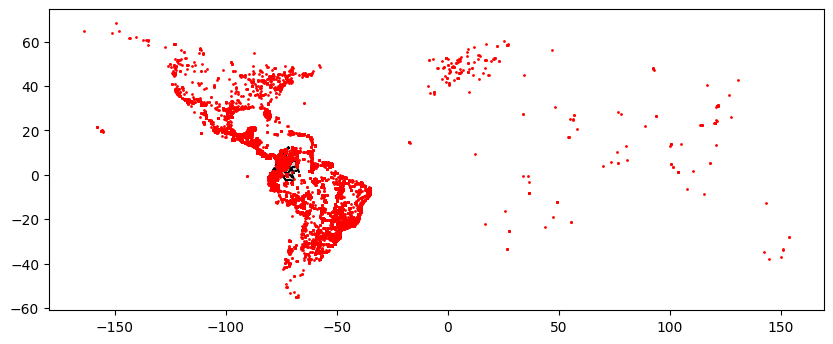

In [68]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the map
colombie.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot the points
meta_train_gdf.plot(ax=ax, marker='o', color='red', markersize=1)